<h2 style="text-align:center;">Welcome to the fourth laboratory work in this course</h2>
<h4 style="text-align:center;">This laboratory work is graded</h4>

<span style="color:#011f4b; font-size:15px"><b>The goal</b> of the laboratory work - is to start data preprocessing process 
<br/>
<b>Learning outcomes:</b>
* to be able to explore data distributions
* to handle missing values
</span>
<br/><br/>
<span style="color:#011f4b;">
Your task is to complete this laboratory work within 80 minutes and submit the .ipynb file to DL "Laboratory03". 
<br/>
<b>Pay attention to the file name - your file should be named as "Laboratory_work_04_Yoursurname_YourName_yourgroup".</b> In case you didn't name your file properly (as showed before) <b>-5% penalty</b> will be applied.
</span>

<hr>

<span style="color:#011f4b">Because data is often taken from multiple sources which are normally not too reliable and that too in different formats, more than half our time is consumed in dealing with data quality issues when working on a machine learning problem. It is simply unrealistic to expect that the data will be perfect. There may be problems due to human error, limitations of measuring devices, or flaws in the data collection process.

<span style="color:#011f4b"><b> <b><span style="font-size:20px; color:orange">T</span>his laboratory class is focused on your individual work</b>. So you will not be provided with examples, almost.
    <span style="color:#00a0e5"> Данная лабораторная работа более самостоятельная</span>
<br/><br/>
Now, let's go to practice </span>

<b>First things first,</b> import <code><b>matplotlib</b></code>, <code><b>pandas</b></code> and <code><b>numpy</b></code>packages to your notebook. 
<br/> Simply uncomment the cell below:

<p style="text-align:right; color:#1460AA;">+2
    points </p>

In [3]:
# Run this cell - Запустите эту ячейку SHFT+Enter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<b>Inline</b> your matplotlib

In [4]:
#Run this cell - Запустите эти ячейки SHFT+Enter
%matplotlib inline

<p style="text-align:right; color:#1460AA;">+2
    points </p>

In [5]:
# Run this cell - Запустите эти ячейки SHFT+Enter
dataset = pd.read_csv("House_prices.csv")
dataset.head(10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,Neighborhood,HouseStyle,OverallQual,...,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,PoolArea,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,CollgCr,2Story,7,...,Ex,Y,SBrkr,856,854,3,1,0,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,Veenker,1Story,6,...,Ex,Y,SBrkr,1262,0,3,1,0,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,CollgCr,2Story,7,...,Ex,Y,SBrkr,920,866,3,1,0,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Crawfor,2Story,7,...,Gd,Y,SBrkr,961,756,3,1,0,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,NoRidge,2Story,8,...,Ex,Y,SBrkr,1145,1053,4,1,0,Normal,250000
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Mitchel,1.5Fin,5,...,Ex,Y,SBrkr,796,566,1,1,0,Normal,143000
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Somerst,1Story,8,...,Ex,Y,SBrkr,1694,0,3,1,0,Normal,307000
7,60,RL,10382,Pave,IR1,Lvl,AllPub,NWAmes,2Story,7,...,Ex,Y,SBrkr,1107,983,3,1,0,Normal,200000
8,50,RM,6120,Pave,Reg,Lvl,AllPub,OldTown,1.5Fin,7,...,Gd,Y,FuseF,1022,752,2,2,0,Abnorml,129900
9,190,RL,7420,Pave,Reg,Lvl,AllPub,BrkSide,1.5Unf,5,...,Ex,Y,SBrkr,1077,0,2,2,0,Normal,118000


So, here we see that you will work with dataset about House Prices and conditions. (<span style="color:#00a0e5">Сегодня вы работаете с данными о продаже домов и их состояния а момент продажи</span>)

Here, you can see the description for this dataset (<span style="color:#00a0e5">Для понимания здесь вы найдете описание фич</span>)

* SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotArea: Lot size in square feet
* Street: Type of road access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* Neighborhood: Physical locations within Ames city limits
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* ExterQual: Exterior material quality
* Foundation: Type of foundation
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* BedroomAbvGr: Number of bedrooms above garage
* KitchenAbvGr: Number of kitchens above garage
* PoolArea: Pool area in square feet
* SaleCondition: Condition of sale

<h3>TASK 1: Data observation </h3>

<b>Task 1.1 </b> Take a closer look to your column values. Use <code>dataset.info()</code> (<span style="color:#00a0e5"> Самое время понять с какими данными вы будете работать, используйте указанные методы чтобы иметь общее представление о данных.</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   HouseStyle     1460 non-null   object
 9   OverallQual    1460 non-null   int64 
 10  OverallCond    1460 non-null   int64 
 11  YearBuilt      1460 non-null   int64 
 12  YearRemodAdd   1460 non-null   int64 
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  ExterQual      1460 non-null   object
 16  Foundation     1460 non-null   object
 17  TotalBsmtSF    1460 non-null   int64 
 18  Heating        1460 non-null

<br>By using info() we know that dataset have 29 columns which is 29 data values in it. In total we have 13 numerical and 16 categorical values. </br>

<b> Task 1.2</b> Differentate categorical and numerical values as <code>data_cat</code> and <code>data_num</code> 
 (<span style="color:#00a0e5"> Разделите ваши категориальные и числовые данные на два датафрейма - <code>data_cat</code> и <code>data_num</code> .</span>)

<p style="text-align:right; color:#1460AA;">+6
    points </p>

In [11]:
data_num = dataset.select_dtypes(include="int64")
data_num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,PoolArea,SalePrice
0,60,8450,7,5,2003,2003,856,856,854,3,1,0,208500
1,20,9600,6,8,1976,1976,1262,1262,0,3,1,0,181500
2,60,11250,7,5,2001,2002,920,920,866,3,1,0,223500
3,70,9550,7,5,1915,1970,756,961,756,3,1,0,140000
4,60,14260,8,5,2000,2000,1145,1145,1053,4,1,0,250000


In [9]:
data_cat = dataset.select_dtypes(include="object")
data_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,Neighborhood,HouseStyle,RoofStyle,RoofMatl,ExterQual,Foundation,Heating,HeatingQC,CentralAir,Electrical,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,CollgCr,2Story,Gable,CompShg,Gd,PConc,GasA,Ex,Y,SBrkr,Normal
1,RL,Pave,Reg,Lvl,AllPub,Veenker,1Story,Gable,CompShg,TA,CBlock,GasA,Ex,Y,SBrkr,Normal
2,RL,Pave,IR1,Lvl,AllPub,CollgCr,2Story,Gable,CompShg,Gd,PConc,GasA,Ex,Y,SBrkr,Normal
3,RL,Pave,IR1,Lvl,AllPub,Crawfor,2Story,Gable,CompShg,TA,BrkTil,GasA,Gd,Y,SBrkr,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,NoRidge,2Story,Gable,CompShg,Gd,PConc,GasA,Ex,Y,SBrkr,Normal


<b>Awesome</b>, now you can perform some observation over your dataframe
<br/> 

<b> Task 1.3 </b> Identify if you have any NaNs (<span style="color:#00a0e5"> Определите есть ли у вас пропущенные данные в столбцах.</span>)

NaN (nan, NAN) - stand for not-a-number, in pandas dataframe NaN means that the value was missing (absent).  (<span style="color:#00a0e5"> NaN - это не-число, в даатфрейме пандас если вы встречаете NaN - значит в файле откуда вы считали данных - запись отсутствовала для данной ячейки - т.е. это пропущенное (пустое) значение.</span>)

<p style="text-align:right; color:#1460AA;">+5
    points </p>

In [96]:
i = 0
while i < dataset.shape[1]: 
 if (dataset[str(dataset.iloc[:, i].name)].isna().any()):   
  print('column -',str(dataset.iloc[:, i].name),' - have:', dataset[str(dataset.iloc[:, i].name)].isna().sum(), 'NaN Data')
 i += 1 

column - Electrical  - have: 1 NaN Data


<b>Task 1.4</b> Check unique values for categorical columns and ranges for numerical columns.  (<span style="color:#00a0e5"> Определите уникальные значение для категориальных данных и диапазон данных для числовых</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

In [98]:
i = 0
while i < data_cat.shape[1]: 
 print('column -',str(data_cat.iloc[:, i].name),' - have unique values as:', data_cat[str(data_cat.iloc[:, i].name)].unique())
 i += 1 

column - MSZoning  - have unique values as: ['RL' 'RM' 'C (all)' 'FV' 'RH']
column - Street  - have unique values as: ['Pave' 'Grvl']
column - LotShape  - have unique values as: ['Reg' 'IR1' 'IR2' 'IR3']
column - LandContour  - have unique values as: ['Lvl' 'Bnk' 'Low' 'HLS']
column - Utilities  - have unique values as: ['AllPub' 'NoSeWa']
column - Neighborhood  - have unique values as: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
column - HouseStyle  - have unique values as: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
column - RoofStyle  - have unique values as: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
column - RoofMatl  - have unique values as: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
column - ExterQual  - have un

In [101]:
i = 0
while i < data_num.shape[1]: 
 print('column -',str(data_num.iloc[:, i].name),' - range:', data_num[str(data_num.iloc[:, i].name)].min(), data_num[str(data_num.iloc[:, i].name)].max())
 i += 1

column - MSSubClass  - range: 20 190
column - LotArea  - range: 1300 215245
column - OverallQual  - range: 1 10
column - OverallCond  - range: 1 9
column - YearBuilt  - range: 1872 2010
column - YearRemodAdd  - range: 1950 2010
column - TotalBsmtSF  - range: 0 6110
column - 1stFlrSF  - range: 334 4692
column - 2ndFlrSF  - range: 0 2065
column - BedroomAbvGr  - range: 0 8
column - KitchenAbvGr  - range: 0 3
column - PoolArea  - range: 0 738
column - SalePrice  - range: 34900 755000


Awesome, now you have some understanding what is the data about.  (<span style="color:#00a0e5"> Класс, теперь у вас есть общее понимание - о чем ваши данные и какие значения они могут принимать.</span>)

<h3> Data preparation </h3

<b>Task 2.1</b> Explore the means, medians - if needed, modes for numerical data.  (<span style="color:#00a0e5"> Посмотрите какие средние значения, мода, медиана для числовых данных.</span>)

<p style="text-align:right; color:#1460AA;">+5
    points </p>

In [112]:
data_num.mean()

MSSubClass          56.897260
LotArea          10516.828082
OverallQual          6.099315
OverallCond          5.575342
YearBuilt         1971.267808
YearRemodAdd      1984.865753
TotalBsmtSF       1057.429452
1stFlrSF          1162.626712
2ndFlrSF           346.992466
BedroomAbvGr         2.866438
KitchenAbvGr         1.046575
PoolArea             2.758904
SalePrice       180921.195890
dtype: float64

In [111]:
data_num.median()

MSSubClass          50.0
LotArea           9478.5
OverallQual          6.0
OverallCond          5.0
YearBuilt         1973.0
YearRemodAdd      1994.0
TotalBsmtSF        991.5
1stFlrSF          1087.0
2ndFlrSF             0.0
BedroomAbvGr         3.0
KitchenAbvGr         1.0
PoolArea             0.0
SalePrice       163000.0
dtype: float64

In [110]:
data_num.mode()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,PoolArea,SalePrice
0,20,7200,5,5,2006,1950,0,864,0,3,1,0,140000


<b> Task 2.1.1</b> Create a histogram for numerical data - you can use <code>matplotlib</code> or <code>.plot</code> function of pandas  (<span style="color:#00a0e5"> Постройте гистограмму для числовых данных - вы можете использовать matplotlib или .plot функцию от пандас</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

Example,

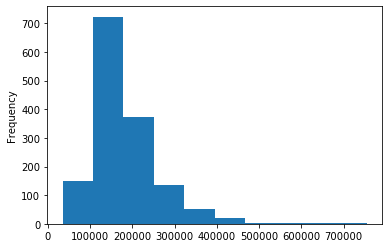

In [24]:
dataset.SalePrice.plot(kind = 'hist')

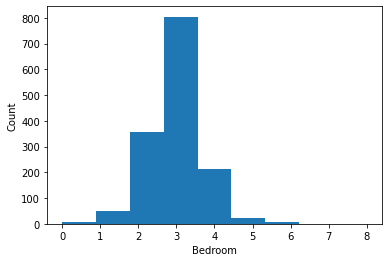

In [158]:
plt.hist(data_num.BedroomAbvGr, density=False, bins=9)  
plt.ylabel('Count')
plt.xlabel('Bedroom');

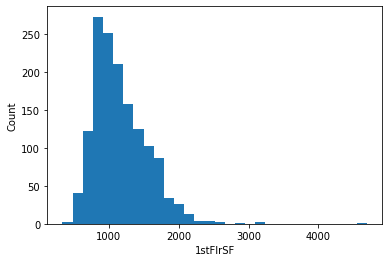

In [167]:
plt.hist(data_num['1stFlrSF'], density=False, bins=30)  
plt.ylabel('Count')
plt.xlabel('1stFlrSF');

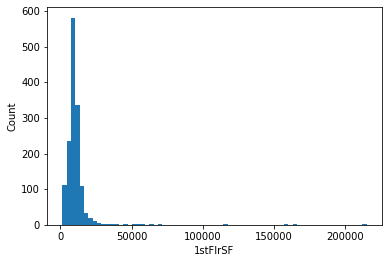

In [168]:
plt.hist(data_num['LotArea'], density=False, bins=70)  
plt.ylabel('Count')
plt.xlabel('1stFlrSF');

<b>Task 2.2</b> Explain what is the shape of your data, what distribution does it look like?
 (<span style="color:#00a0e5"> Опишите форму ваших данных, к какому распределению она подходит?</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

First graph is binominal graph. At this graph we can see probability distribution as a series of vertical bars.

As we can see in 2 and 3 graph we have log-normal distribution. At the start we go to the max point and then by step to the the low stage in log progressive.

<b>TASK 3</b> Visualizations

<b>Task 3.1</b> Visualize your categorical features and wrire down the summary (<span style="color:#00a0e5"> Визуализируйте ваши категориальные данные, напишите выводы по визуализациям</span>)

<p style="text-align:right; color:#1460AA;">+20
    points </p>

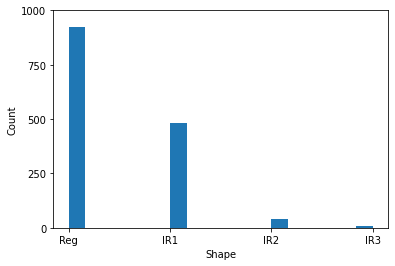

In [190]:
plt.hist(data_cat.LotShape, density=False, bins=18)  
plt.yticks(np.arange(0, 1250, 250))
plt.ylabel('Count')
plt.xlabel('Shape');

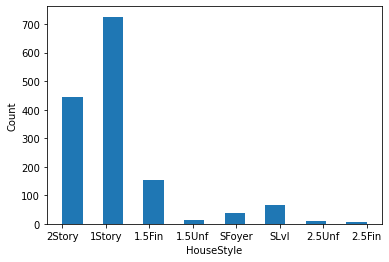

In [199]:
plt.hist(data_cat.HouseStyle, density=False, bins=15)  
plt.yticks(np.arange(0, 800, 100))
plt.ylabel('Count')
plt.xlabel('HouseStyle');

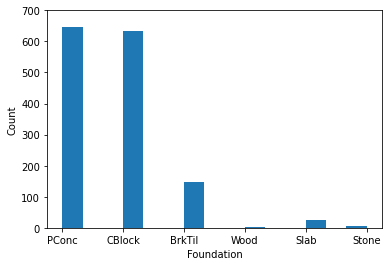

In [209]:
plt.hist(data_cat.Foundation, density=False, bins=15)  
plt.yticks(np.arange(0, 710, 100))
plt.ylabel('Count')
plt.xlabel('Foundation');

#1 In the first graph we can see that max value in 900 shift is 250 

#2 In the second graph we can see that two biggest story has values 450 and 700 and 2.5 Fin has lowest value between all of them

#3 In the Foundation graph we can considered that Pconc has very small value of difference against CBlock

<b> Task 3.2 </b> Create boxplots for any 5 numerical features and investigate if there are possible outliers

<p style="text-align:right; color:#1460AA;">+20
    points </p>

Example, 

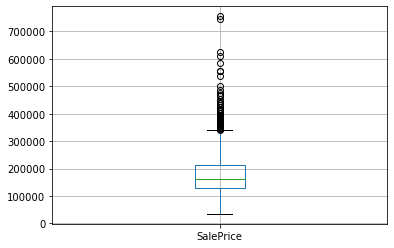

In [30]:
dataset.boxplot('SalePrice')

<AxesSubplot:>

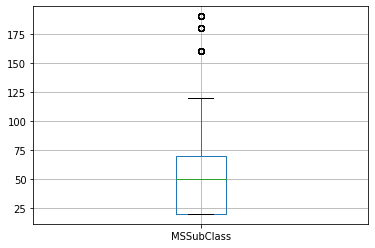

In [210]:
dataset.boxplot('MSSubClass')

<AxesSubplot:>

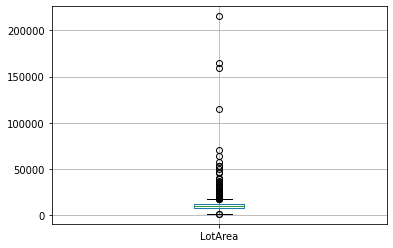

In [214]:
dataset.boxplot('LotArea')

<AxesSubplot:>

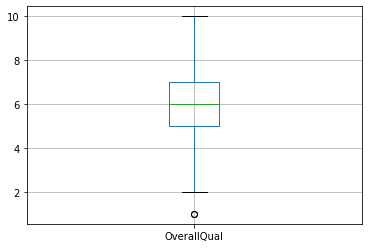

In [213]:
dataset.boxplot('OverallQual')

<AxesSubplot:>

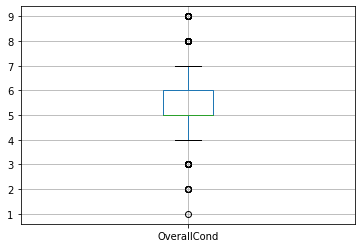

In [212]:
dataset.boxplot('OverallCond')

<AxesSubplot:>

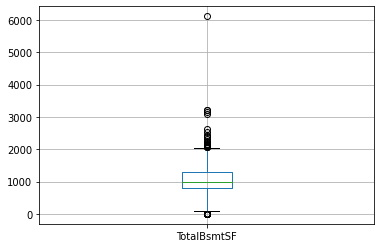

In [211]:
dataset.boxplot('TotalBsmtSF')

In [ ]:
#1

In [ ]:
#2

In [ ]:
#3

In [ ]:
#4

In [ ]:
#5

<b><span style="font-size:20px; color:orange">G</span>reat!</b> You did awesome job! <br/> <br/> But don't stop practicing, remember - since you will be working with data, you have to understand its nature.
<br/> <br/> <b>Now</b> go to the Quiz 04
<br/> 